<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/analise-eleicoes-brasileiras-2022/blob/master/PieRRestudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação dos recursos nescessários

In [184]:
import seaborn as sns
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import json
import folium
import re

###diferenciadores esquerda e direita

In [185]:
url = 'https://pt.m.wikipedia.org/wiki/Posicionamentos_dos_partidos_brasileiros'
table = pd.read_html(url , match='Partido')
politicalPositionTable = table[0][['Partido','Espectro Político']]

In [186]:
#politicalPositionTable['Partido']['Referências'][i]
def cleanPartidoName(wrongName):
  try:
    return re.findall("\([1-ã]{1,}\)", wrongName,flags=re.I )[0].replace(')','').replace('(','').lower()
  except:
    return wrongName

#politicalPositionTable['Espectro Político']['Unnamed: 1_level_1'][i]
def cleanSide(wrongSide):
  side =  re.findall("((esquerda)|(direita))",wrongSide,flags=re.I )#.replace('C','c').replace('Centro','').replace('-','')
  try:
    return side[0][0]
  except:
    return 'centro'


In [187]:
sides = list(map(cleanSide,politicalPositionTable['Espectro Político']['Unnamed: 1_level_1']))
names = list(map(cleanPartidoName,politicalPositionTable['Partido']['Referências']))
ideologicTable = pd.DataFrame(np.c_[names, sides], columns=['partido', 'lado'])
ideologicTable

,partido,lado
0,republicanos,direita
1,pp,Direita
2,pt,esquerda
3,pdt,Esquerda
4,ptb,Direita
5,mdb,centro
6,pstu,Esquerda
7,psl,Direita
8,rede,esquerda
9,pode,direita


In [188]:
def getIdeologia(partido):
  return ideologicTable[ideologicTable['partido'] == partido.lower()]['lado'].values[0].lower()
getIdeologia('PP')

'direita'

In [189]:
colorsTable = {
    "esquerda":"red",
    "direita":"green",
    "centro":"blue"
}
def getCorDaIdeologia(partido):
  try:
    ideologia = getIdeologia(partido)
    return colorsTable[ideologia]
  except:
    print('errou')
    return 'black'

getCorDaIdeologia('PP')

'green'

###obtenção dos dados

In [190]:
dados = pd.read_csv('/content/drive/MyDrive/dados eleições/votacao_partido_munzona_2020_BRASIL.csv',sep=";",encoding='latin-1')

In [191]:
queryPrimeiroTurno = dados[
    (dados['NR_TURNO'] == 1)
]

In [192]:

data = queryPrimeiroTurno[['SG_UF','NR_PARTIDO','SG_PARTIDO','NM_PARTIDO','QT_VOTOS_NOMINAIS','DS_CARGO']]
data.head()

,SG_UF,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_VOTOS_NOMINAIS,DS_CARGO
0,AM,12,PDT,Partido Democrático Trabalhista,457,Vereador
1,SP,15,MDB,Movimento Democrático Brasileiro,1246,Vereador
2,SP,17,PSL,Partido Social Liberal,1142,Vereador
3,AP,22,PL,Partido Liberal,1484,Vereador
4,RS,25,DEM,Democratas,407,Vereador


In [193]:
def getDataByUf(uf,cargo = 'Vereador'):
  thisUfData = data[(data['SG_UF'] == uf.upper()) & (data['DS_CARGO'] == cargo)]
  grouped = thisUfData.groupby(['SG_PARTIDO']).agg(quantidade=( 'QT_VOTOS_NOMINAIS', 'sum'))
  return grouped.sort_values(by='quantidade',ascending=False)

rrDataV,piDataV = getDataByUf('rr'), getDataByUf('pi')
rrDataV.head()

,quantidade
SG_PARTIDO,
REPUBLICANOS,31365
SOLIDARIEDADE,30814
MDB,24417
PSD,14423
PL,11694


[31366, 30815, 24418, 14424, 11695, 11167, 10850, 10359, 10024, 9482, 9190, 8574, 7986, 7845, 7445, 6861, 6074, 5956, 4911, 4625, 4400, 3727, 2301, 2300, 1021, 759, 639, 37]
errou


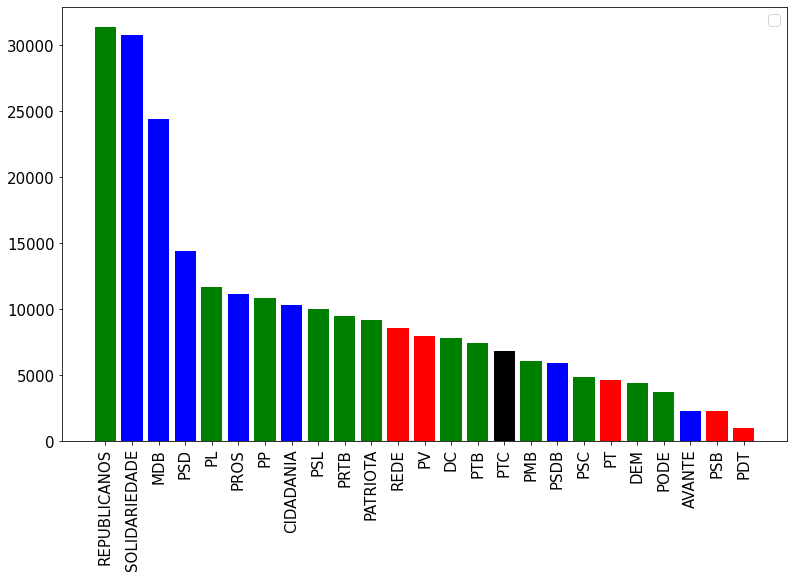

In [194]:
def showQnt(data,color,extraFunctions=[]):
  fig, ax = plt.subplots()
  for i in extraFunctions:
    i(fig,ax)
  amostra = list(map( lambda x: int(x)+1 , data['quantidade'].values[:50]))
  print(amostra)
  colors = sns.color_palette(color,np.max(amostra))
  bar_colors = list(map(getCorDaIdeologia,data.index[:25]))

  ax.bar( 
      data.index[:25], 
      data['quantidade'][:25],
      color=bar_colors[:25]
       )
  fig.set_size_inches(13,8)
  ax.legend()
  plt.rcParams.update({'font.size': 15})
  plt.xticks(rotation = 90)
  fig.patch.set_facecolor('xkcd:white')
  plt.show()

showQnt(getDataByUf('rr','Vereador'),'viridis')

[88174, 39654, 18153, 17842, 15521, 14960, 13559, 13452, 11732, 8304, 5022, 2728, 2439, 1967, 1487, 1131, 972, 584, 411]


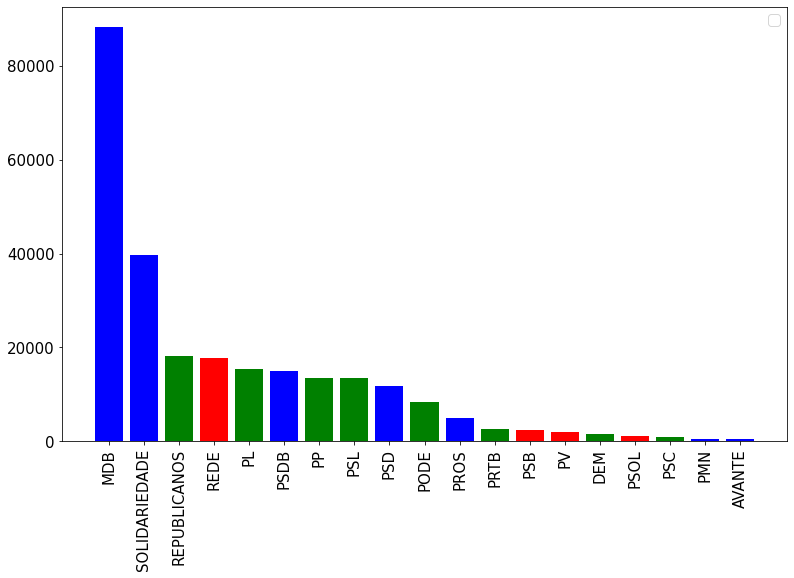

In [195]:
showQnt(getDataByUf('rr','Prefeito'),'viridis')

[395854, 255444, 247063, 236915, 130473, 97937, 81162, 55031, 54805, 52222, 47100, 44319, 34671, 21633, 20831, 15093, 14448, 12233, 11574, 9969, 9230, 8769, 5149, 4739, 3952, 2382, 1751, 811, 246, 196]


errou


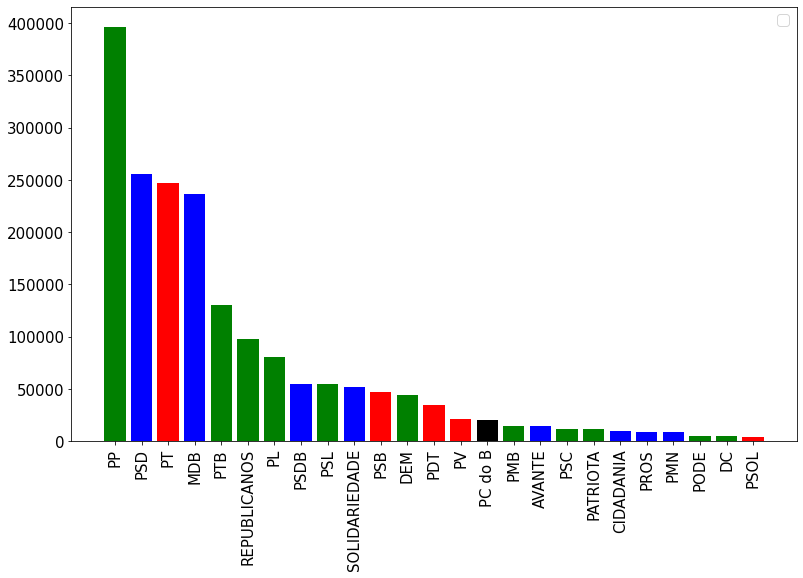

In [196]:
showQnt(getDataByUf('pi','Vereador'),'magma_r')

[427997, 388136, 264267, 246322, 131233, 101000, 94938, 73456, 57510, 51067, 31333, 20279, 13046, 9240, 7829, 7143, 4146, 3775, 3268, 3238, 2953, 2737, 590, 458, 372, 331, 160, 129]


errou
errou


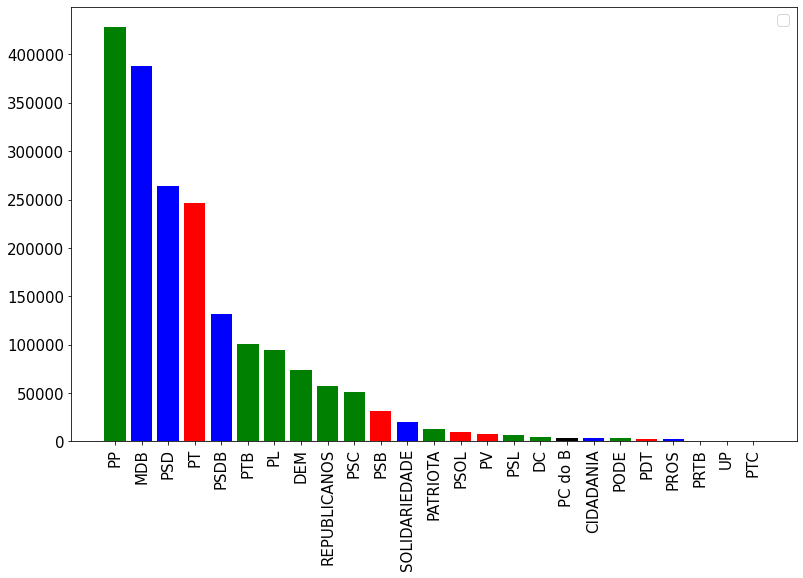

In [197]:
showQnt(getDataByUf('pi','Prefeito'),'magma_r')